# Brain Tumor Classification Project

## Loading & Preprocessing Dataset

2023-06-14 01:30:08.195581: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


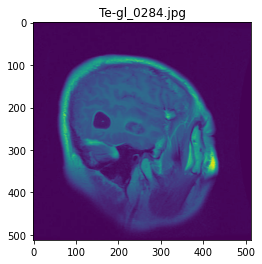

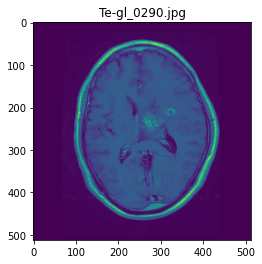

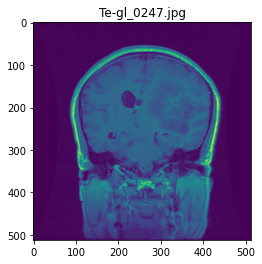

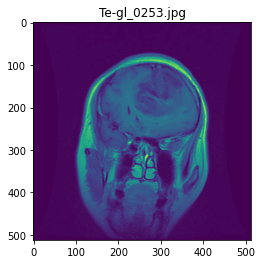

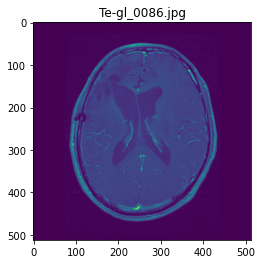

In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

image_dir = '/Users/maxhedemanjoosten/Documents/BSc2 Econometrie & Economie/Jaar 3/Machine & Deep Learning/Brain Tumor Classification/dataset/Testing/glioma'
image_files = os.listdir(image_dir)

training_dir = '/Users/maxhedemanjoosten/Documents/BSc2 Econometrie & Economie/Jaar 3/Machine & Deep Learning/Brain Tumor Classification/dataset/Training/'
testing_dir = '/Users/maxhedemanjoosten/Documents/BSc2 Econometrie & Economie/Jaar 3/Machine & Deep Learning/Brain Tumor Classification/dataset/Testing/'

c = 0

for file_name in image_files:
    
    # Construct the full file path
    file_path = os.path.join(image_dir, file_name)

    # Open the image using PIL
    image = Image.open(file_path)

    # Display the image using matplotlib
    plt.imshow(image)
    plt.title(file_name)
    plt.axis('on')
    plt.show()
    
    # If I want to see first number of images only
    c += 1
    if c == 5:
        break

labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load training and testing datasets
image_size = (512, 512)

training_images = []
training_labels = []
for i, label in enumerate(labels):
    folder_path = os.path.join(training_dir, label)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        image = Image.open(file_path)

        # Convert RGB to grayscale 
        gray_image = image.convert('L')
        resized_image = gray_image.resize(image_size)
        
        # Convert to array and normalize pixel values
        image_array = np.array(resized_image)
        normalized_image_array = image_array / 255.0
        
        training_images.append(normalized_image_array)
        training_labels.append(i)

testing_images = []
testing_labels = []
for i, label in enumerate(labels):
    folder_path = os.path.join(testing_dir, label)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        
        image = Image.open(file_path)

        # Convert RGB to grayscale 
        gray_image = image.convert('L')
        resized_image = gray_image.resize(image_size)
       
        # Convert to array and normalize pixel values
        image_array = np.array(resized_image)
        normalized_image_array = image_array / 255.0

        testing_images.append(normalized_image_array)
        testing_labels.append(i)

X_train = np.array(training_images)
Y_train = keras.utils.to_categorical(training_labels)

X_test = np.array(testing_images)
Y_test = keras.utils.to_categorical(testing_labels)

In [2]:
X_test.shape

(1311, 512, 512)

In [3]:
X_test = X_test.reshape(-1, 512, 512, 1) 
X_test.shape

(1311, 512, 512, 1)

## Convolutional Neural Network

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=(9, 9), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 504, 504, 64)      5248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 252, 252, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4064256)           0         
                                                                 
 dense (Dense)               (None, 128)               520224896 
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 520,230,660
Trainable params: 520,230,660
Non-trainable params: 0
__________________________________________

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model: choose batch size and number of epochs
history = model.fit(X_test, Y_test, batch_size=16, epochs=20, validation_split=0.2)

Epoch 1/20
66/66 [==============================] - 1246s 18s/step - loss: 6.3568 - accuracy: 0.5410 - val_loss: 2.3954 - val_accuracy: 0.0038
Epoch 2/20
66/66 [==============================] - 1722s 25s/step - loss: 0.4726 - accuracy: 0.8177 - val_loss: 3.1561 - val_accuracy: 0.2015
Epoch 3/20
66/66 [==============================] - 1495s 23s/step - loss: 0.1070 - accuracy: 0.9647 - val_loss: 5.5473 - val_accuracy: 0.1103
Epoch 4/20
66/66 [==============================] - 979s 15s/step - loss: 0.0302 - accuracy: 0.9924 - val_loss: 6.5025 - val_accuracy: 0.2129
Epoch 5/20
66/66 [==============================] - 927s 14s/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 8.5185 - val_accuracy: 0.2129
Epoch 6/20
66/66 [==============================] - 966s 15s/step - loss: 6.5455e-04 - accuracy: 1.0000 - val_loss: 8.7930 - val_accuracy: 0.2167
Epoch 7/20
66/66 [==============================] - 925s 14s/step - loss: 3.3311e-04 - accuracy: 1.0000 - val_loss: 9.1956 - val_accuracy: 0.

In [7]:
model.save("ClassifierV1")

INFO:tensorflow:Assets written to: ClassifierV1/assets


INFO:tensorflow:Assets written to: ClassifierV1/assets


In [10]:
X_train = X_train.reshape(-1, 512, 512, 1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_train[256:512], Y_train[256:512], batch_size=16)
print('Test accuracy:', test_acc)

16/16 [==============================] - 10s 516ms/step - loss: 0.5465 - accuracy: 0.8906
Test accuracy: 0.890625


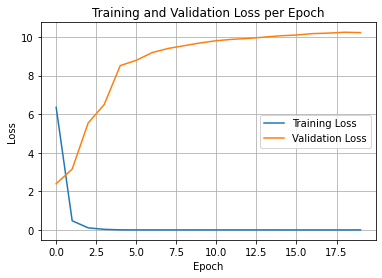

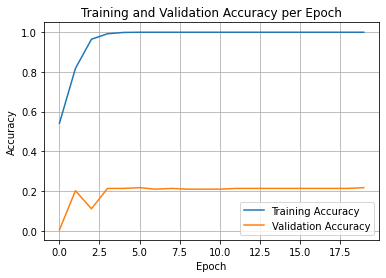

In [11]:
# plot losses
plt.plot(history.history["loss"], label='Training Loss') # plot loss
plt.plot(history.history["val_loss"], label="Validation Loss") # plot val_loss
plt.ylabel("Loss")
plt.xlabel("Epoch") # x-axis=epochs
plt.grid()
plt.legend()
plt.title("Training and Validation Loss per Epoch")
plt.show()

# plot accuracies
plt.plot(history.history["accuracy"], label='Training Accuracy') # plot accuracy
plt.plot(history.history["val_accuracy"], label='Validation Accuracy') # plot val_accuracy
plt.ylabel("Accuracy")
plt.xlabel("Epoch") # x-axis=epochs
plt.grid()
plt.legend()
plt.title("Training and Validation Accuracy per Epoch")
plt.show()